<a href="https://colab.research.google.com/github/Kar1995/Machine-Learning-Regression/blob/main/Regression_Capstone_Project_New_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from numpy import math

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Importing the Dataset
dataset1= pd.read_csv('/content/drive/MyDrive/Machine Learning/Rossmann Stores Data.csv')



<ipython-input-6-50740b9382db>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset1= pd.read_csv('/content/drive/MyDrive/Machine Learning/Rossmann Stores Data.csv')


In [7]:
dataset2=pd.read_csv('/content/drive/MyDrive/Machine Learning/store.csv')

In [8]:
dataset=pd.merge(dataset1,dataset2)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [10]:
len(dataset)

1017209

In [11]:
dataset.shape

(1017209, 18)

In [12]:
dataset.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [13]:
dataset.fillna(value=0,inplace=True)

In [14]:
dataset.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [15]:
dataset.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.415982e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.710253e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.320000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [16]:
dataset.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [17]:
dataset.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [18]:
dataset.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

In [19]:
dataset['Date']=pd.to_datetime(dataset['Date'],format='%Y-%m-%d')

In [20]:
dataset['year']=dataset['Date'].dt.year
dataset['month']=dataset['Date'].dt.month
dataset['weekofyear']=dataset['Date'].dt.weekofyear
dataset['dayofweek']=dataset['Date'].dt.dayofweek

<ipython-input-20-d48fc46609c6>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset['weekofyear']=dataset['Date'].dt.weekofyear


Text(0, 0.5, 'No of counts')

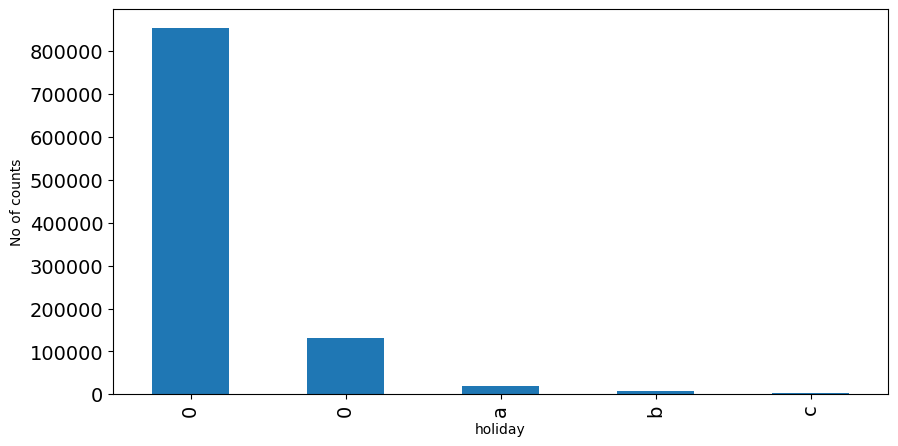

In [21]:
# State Holidays and its counts.

state_holidays=dataset.StateHoliday.value_counts().plot.bar(
            figsize=(10,5),
            fontsize=14
             )
state_holidays.set_xlabel('holiday')
state_holidays.set_ylabel('No of counts')

Text(0, 0.5, 'No of Counts')

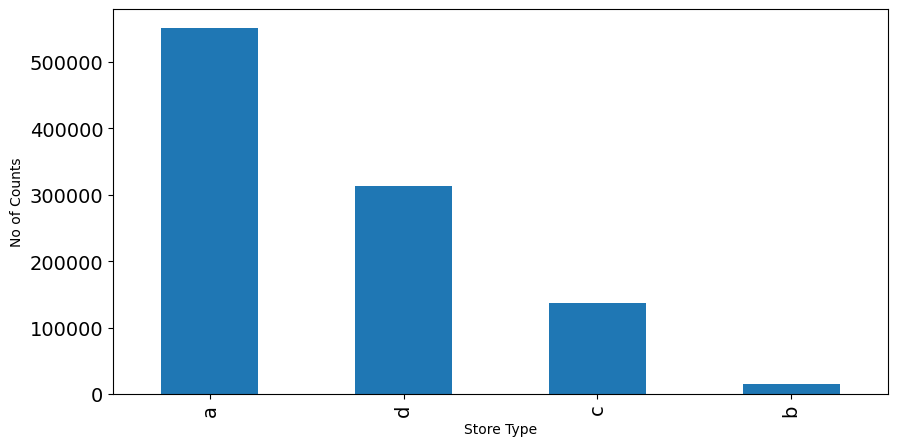

In [22]:
# Store Type and its Frequncy.

store_type=dataset.StoreType.value_counts().plot.bar(
           figsize=(10,5),
           fontsize=14
)
store_type.set_xlabel('Store Type')
store_type.set_ylabel('No of Counts')


Text(0, 0.5, 'No of Counts')

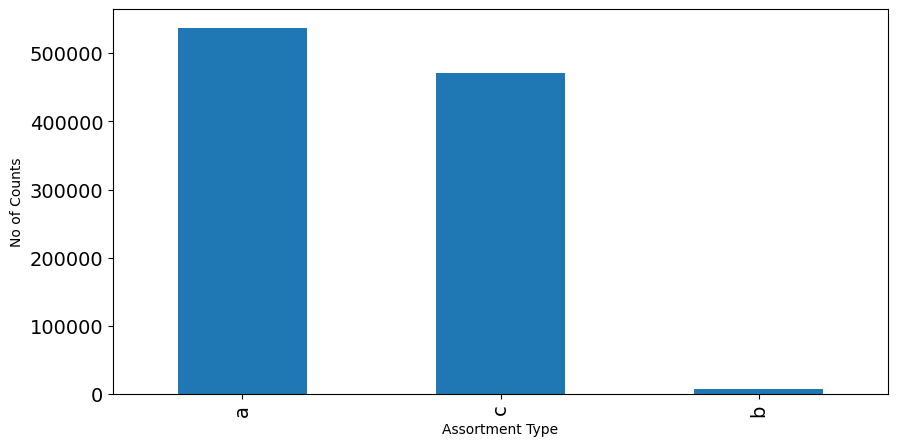

In [23]:
# Assortment Types

assortment_type=dataset.Assortment.value_counts().plot.bar(
           figsize=(10,5),
           fontsize=14
)
assortment_type.set_xlabel('Assortment Type')
assortment_type.set_ylabel('No of Counts')



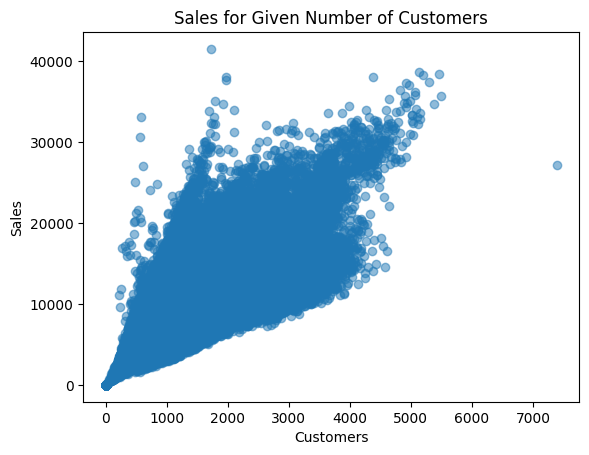

In [24]:
# Scatter plot of Customers and Sales.

plt.scatter(dataset['Customers'],dataset['Sales'],alpha=0.5)
plt.title('Sales for Given Number of Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

Text(0, 0.5, 'Sales')

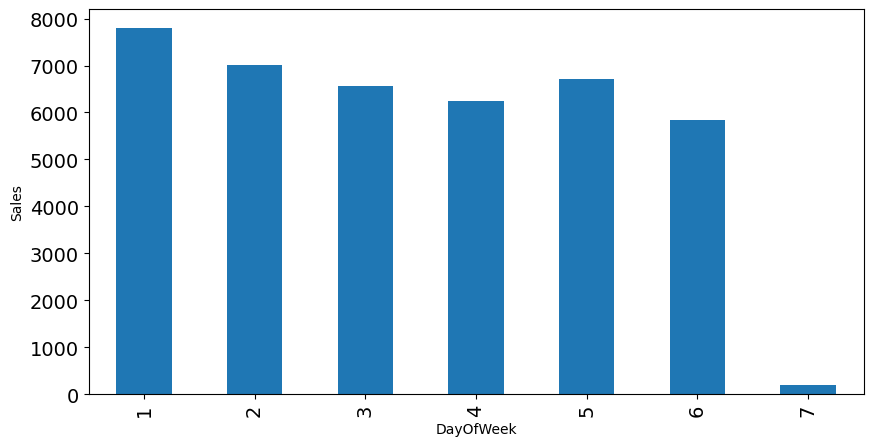

In [25]:
# Sales in a Week.

days_sales=dataset.groupby(['DayOfWeek'])['Sales'].mean().plot.bar(
           figsize=(10,5),
           fontsize=14
)
days_sales.set_xlabel('DayOfWeek')
days_sales.set_ylabel('Sales')

In [26]:
dataset['Store_a']=np.where(dataset['StoreType']=='a',1,0)
dataset['Store_b']=np.where(dataset['StoreType']=='b',1,0)
dataset['Store_c']=np.where(dataset['StoreType']=='c',1,0)
dataset['Store_d']=np.where(dataset['StoreType']=='d',1,0)



In [27]:
dataset['holiday_0']=np.where(dataset['SchoolHoliday']=='0',1,0)
dataset['holiday_a']=np.where(dataset['SchoolHoliday']=='a',1,0)
dataset['holiday_b']=np.where(dataset['SchoolHoliday']=='b',1,0)
dataset['holiday_c']=np.where(dataset['SchoolHoliday']=='c',1,0)

In [28]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,weekofyear,dayofweek,Store_a,Store_b,Store_c,Store_d,holiday_0,holiday_a,holiday_b,holiday_c
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,31,4,0,0,1,0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,31,3,0,0,1,0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,31,2,0,0,1,0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,31,1,0,0,1,0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,31,0,0,0,1,0,0,0,0,0


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [30]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,weekofyear,dayofweek,Store_a,Store_b,Store_c,Store_d,holiday_0,holiday_a,holiday_b,holiday_c
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,31,4,0,0,1,0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,31,3,0,0,1,0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,31,2,0,0,1,0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,31,1,0,0,1,0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,31,0,0,0,1,0,0,0,0,0


In [31]:
dependent_variable='Sales'

In [32]:
# Create a list of independent Variables

independent_variables=list(set(dataset.columns.tolist())-{dependent_variable}-{'year','dayofweek','month','DayofWeek','weekofyear','SchoolHoliday','StoreType','Date','Assortment','PromoInterval','StateHoliday'})

In [33]:
independent_variables

['holiday_0',
 'Promo2',
 'Store_a',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Store',
 'Store_b',
 'DayOfWeek',
 'Promo2SinceYear',
 'holiday_c',
 'Store_c',
 'Promo2SinceWeek',
 'Customers',
 'CompetitionDistance',
 'Store_d',
 'Promo',
 'holiday_a',
 'holiday_b',
 'Open']

In [34]:
dataset[['CompetitionDistance','CompetitionOpenSinceYear','CompetitionOpenSinceMonth','Promo2SinceYear','Promo2SinceWeek']]=dataset[['CompetitionDistance','CompetitionOpenSinceYear','CompetitionOpenSinceMonth','Promo2SinceYear','Promo2SinceWeek']].astype(int)

Text(0, 0.5, 'Sales')

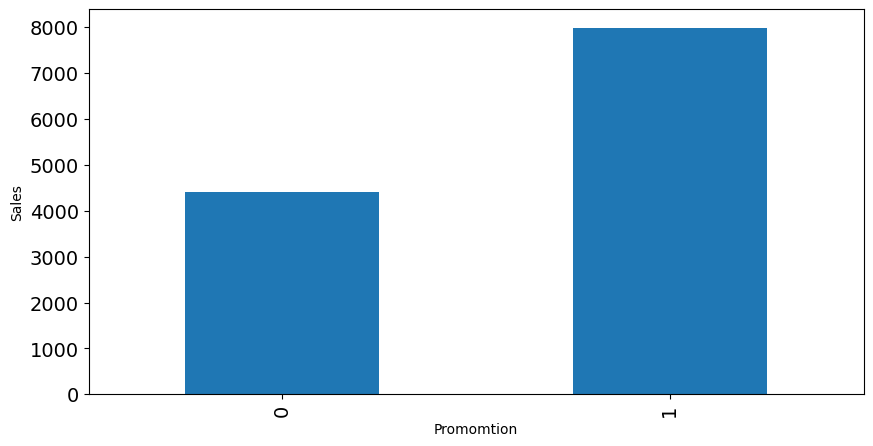

In [35]:
Promo_sales=dataset.groupby(['Promo'])['Sales'].mean().plot.bar(
           figsize=(10,5),
           fontsize=14
)
Promo_sales.set_xlabel('Promomtion')
Promo_sales.set_ylabel('Sales')

Text(0, 0.5, 'Sales')

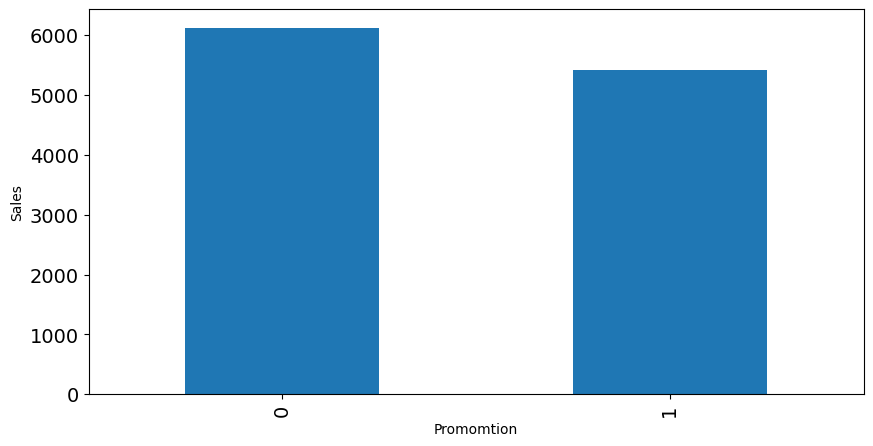

In [36]:
Promo2_sales=dataset.groupby(['Promo2'])['Sales'].mean().plot.bar(
           figsize=(10,5),
           fontsize=14
)
Promo2_sales.set_xlabel('Promomtion')
Promo2_sales.set_ylabel('Sales')

Text(0, 0.5, 'Sales')

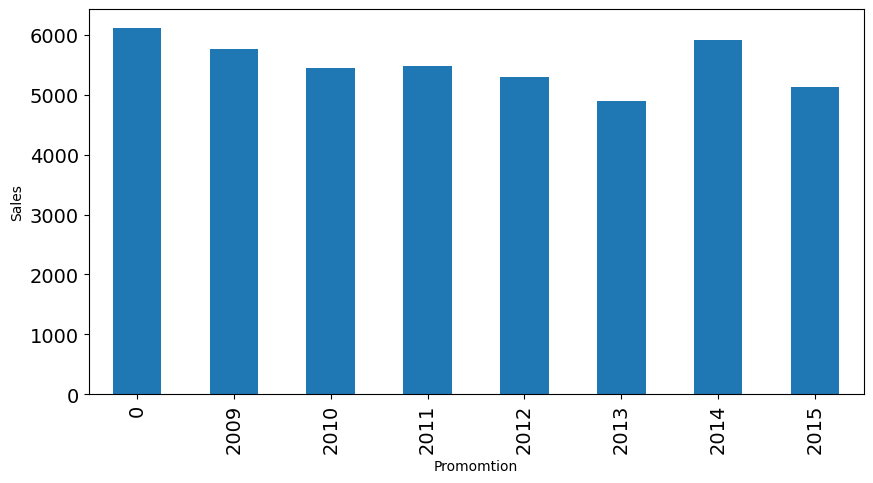

In [37]:
PromoYear_sales=dataset.groupby(['Promo2SinceYear'])['Sales'].mean().plot.bar(
           figsize=(10,5),
           fontsize=14
)
PromoYear_sales.set_xlabel('Promomtion')
PromoYear_sales.set_ylabel('Sales')

Text(0, 0.5, 'Sales')

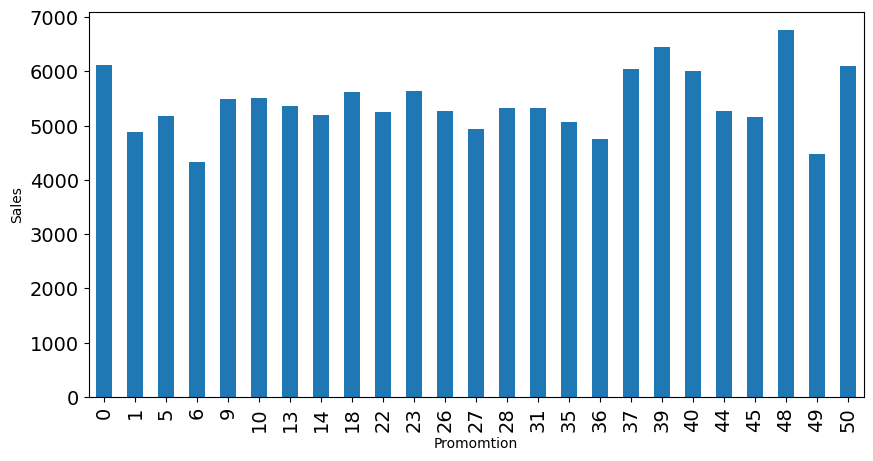

In [38]:
Promo2Week_sales=dataset.groupby(['Promo2SinceWeek'])['Sales'].mean().plot.bar(
           figsize=(10,5),
           fontsize=14
)
Promo2Week_sales.set_xlabel('Promomtion')
Promo2Week_sales.set_ylabel('Sales')

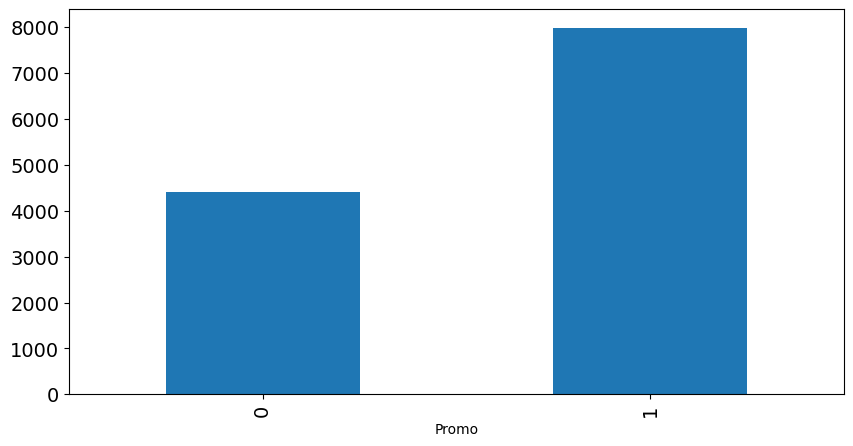

In [39]:
PromoInterval_sales=dataset.groupby(['Promo'])['Sales'].mean().plot.bar(
           figsize=(10,5),
           fontsize=14
)
PromoInterval_sales.set_xlabel=('Promomtion')
PromoInterval_sales.set_ylabel=('Sales')

In [40]:
 dataset.drop('PromoInterval',axis='columns',inplace=True)

In [41]:
X =dataset[independent_variables].values

In [42]:
y= dataset[dependent_variable].values

In [43]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
X_train[:10]

array([[    0,     0,     1,     5,  2011,   698,     0,     1,     0,
            0,     0,     0,  1917,  1790,     0,     1,     0,     0,
            1],
       [    0,     0,     0,     9,  2006,   682,     1,     3,     0,
            0,     0,     0,  2068,   150,     0,     1,     0,     0,
            1],
       [    0,     1,     0,     8,  2009,    77,     0,     6,  2014,
            0,     0,    10,   660,  1090,     1,     0,     0,     0,
            1],
       [    0,     1,     1,     6,  2007,    59,     0,     1,  2011,
            0,     0,    14,   875,  2840,     0,     1,     0,     0,
            1],
       [    0,     0,     0,     0,     0,   724,     0,     1,     0,
            0,     0,     0,   698,  5900,     1,     0,     0,     0,
            1],
       [    0,     0,     0,     6,  2011,   729,     0,     3,     0,
            0,     1,     0,   866,  8980,     0,     0,     0,     0,
            1],
       [    0,     0,     1,     3,  2013,   788,   

In [45]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
X_train[0:10]

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 4.16666667e-01,
        9.98014888e-01, 6.25673250e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.59474824e-01, 2.35960981e-02, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.50000000e-01,
        9.95533499e-01, 6.11310592e-01, 1.00000000e+00, 3.33333333e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.79913373e-01, 1.97732665e-03, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 6.66666667e-01,
        9.97022333e-01, 6.82226212e-02, 0.00000000e+00, 8.33333333e-01,
        9.99503722e-01, 0.00000000e+00, 0.00000000e+00, 2.00000000e-01,
        8.93340552e-02, 1.43685737e-02, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00

In [47]:
# Fitting Multiple Linear Regression to the Training set
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [48]:
regressor.intercept_

821958142480008.2

In [49]:
regressor.coef_

array([ 0.00000000e+00,  9.27111188e+04, -8.21958142e+14, -8.96961297e+01,
        1.36488599e+02, -1.08925937e+02, -8.21958142e+14, -1.99410848e+02,
       -9.27665950e+04,  1.57988890e+09, -8.21958142e+14,  2.74376347e+02,
        5.39420174e+04,  1.70143778e+03, -8.21958142e+14,  1.10571362e+03,
        0.00000000e+00,  0.00000000e+00,  9.66652711e+02])

In [50]:
y_pred_train=regressor.predict(X_train)

In [51]:
y_train

array([16892, 14550,  7565, ...,  6433, 12028,  8981])

In [52]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [53]:
#Predicted sales of test data
y_pred

array([4039.875, 6523.125, 6016.   , ..., 7421.5  , 4039.   , 5113.125])

In [54]:
#Actual sales of test data
y_test

array([3598, 7212, 5894, ..., 6184, 3335, 5922])

In [55]:
mean_squared_error(y_test,y_pred)

1572568.0109778678

In [56]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

1256.0833620130497

In [57]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1254.020737857978

In [58]:
# r2_score of trainng. 
r2_score(y_train, y_pred_train)

0.8936976042838791

In [59]:
# r2_score of testing
r2_score(y_test, y_pred)

0.8933228911339958

In [60]:
pd.DataFrame(zip(y_test,y_pred),columns=['actual','Pred'])

,actual,Pred
0,3598,4039.875
1,7212,6523.125
2,5894,6016.000
3,7493,8029.750
4,0,-273.500
...,...,...
203437,3862,4607.500
203438,16840,16160.875
203439,6184,7421.500
203440,3335,4039.000


**Ridge Regression Model**

In [61]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [62]:
ridge_regressor=Ridge()

In [63]:
ridge_regressor

Ridge()

In [64]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgeCV=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgeCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [65]:
print(ridgeCV.best_params_)

{'alpha': 1}


In [66]:
print(ridgeCV.best_score_)

-1580074.7113390062


In [67]:
ridge_predict=ridgeCV.predict(X_test)

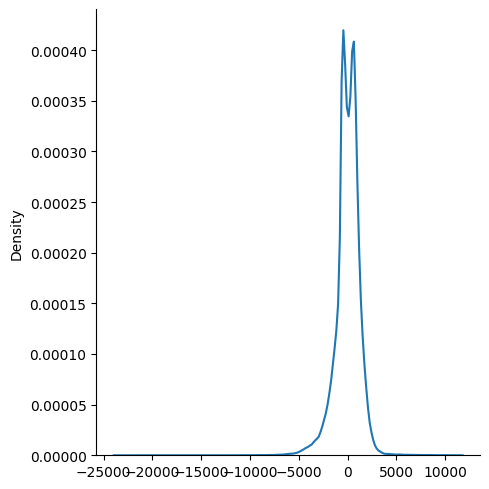

In [68]:
import seaborn as sns
sns.displot(ridge_predict-y_test,kind='kde')

In [69]:
score=r2_score(ridge_predict,y_test)

In [70]:
score

0.8802887033980609

In [71]:
pd.DataFrame(zip(y_test,ridge_predict),columns=['actual','pred'])

,actual,pred
0,3598,3974.763290
1,7212,6522.504724
2,5894,6014.746800
3,7493,8030.766008
4,0,-276.748828
...,...,...
203437,3862,4705.843240
203438,16840,16151.786864
203439,6184,7416.778748
203440,3335,4019.900841


**Lasso Rigression**

In [72]:
from sklearn.linear_model import Lasso

In [73]:
lasso=Lasso()

In [74]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassoCV=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassoCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [75]:
print(lassoCV.best_params_)
print(lassoCV.best_score_)

{'alpha': 1}
-1581513.493138659


In [76]:
lasso_pred=lassoCV.predict(X_test)

In [77]:
lasso_pred

array([3993.56615232, 6528.29588861, 6005.1487227 , ..., 7425.27529701,
       4042.78352297, 5129.2956206 ])

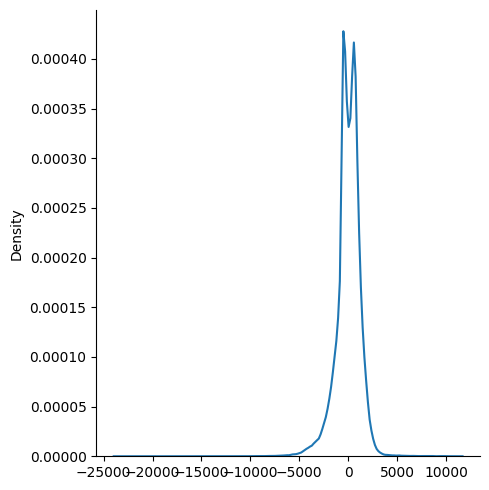

In [78]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')

In [79]:
score=r2_score(lasso_pred,y_test)

In [80]:
score

0.8790711157695907

In [86]:
pd.DataFrame(zip(y_test,lasso_pred),columns=['actual','Pred'])

,actual,Pred
0,3598,3993.566152
1,7212,6528.295889
2,5894,6005.148723
3,7493,8011.453562
4,0,-271.000237
...,...,...
203437,3862,4704.154644
203438,16840,16048.992125
203439,6184,7425.275297
203440,3335,4042.783523
